# 02- TensorFlow Estimator API

## 1- Regression Example

First of all, we import our ML libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

As before, we create our data sample: y = 0.5*x + 5 + noise

Remember this is just an example

In [57]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))

y_true = (0.5 * x_data) + 5 + noise

x_df = pd.DataFrame(data=x_data,columns=['X data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df,y_df],axis=1)

Now we have to create our feature columns for the estimator

In [3]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

In [4]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptze5u2lq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1f9c16f278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Don't bother about that warnings, it's just information

Now let's create our Model with sklearn and make the split of 30% for testing and 70% for training

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

Now we are going to see some values of our train models and evaluate models, as well as its shape

In [10]:
print(x_train)
print(x_train.shape)

[ 6.83743684  5.66519567  3.97899398 ...,  4.76497476  2.14539215
  1.76991177]
(700000,)


In [11]:
print(x_eval)
print(x_eval.shape)

[ 1.80580181  2.0977321   8.20631821 ...,  6.52283652  9.97530998
  3.97208397]
(300000,)


As you see it makes sense, 30% for evaluation and 70% for training

We need to setup our estimator inputs. The estimator function acts like the feed dictionary and batch size

In [12]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

Now we need to create more input functions for our test data and train data

Shuffle is false because this function is going to be used in order to evaluate against the test data

In [13]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [17]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

We need to train our estimator

In [18]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmptze5u2lq/model.ckpt.
INFO:tensorflow:loss = 474.094, step = 1
INFO:tensorflow:global_step/sec: 477.512
INFO:tensorflow:loss = 15.7293, step = 101 (0.218 sec)
INFO:tensorflow:global_step/sec: 571.167
INFO:tensorflow:loss = 36.3777, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 534.144
INFO:tensorflow:loss = 26.503, step = 301 (0.189 sec)
INFO:tensorflow:global_step/sec: 604.972
INFO:tensorflow:loss = 14.8078, step = 401 (0.165 sec)
INFO:tensorflow:global_step/sec: 290.543
INFO:tensorflow:loss = 7.04009, step = 501 (0.354 sec)
INFO:tensorflow:global_step/sec: 416.346
INFO:tensorflow:loss = 13.5732, step = 601 (0.234 sec)
INFO:tensorflow:global_step/sec: 444.444
INFO:tensorflow:loss = 7.81547, step = 701 (0.219 sec)
INFO:tensorflow:global_step/sec: 499.998
INFO:tensorflow:loss = 9.39688, step = 801 (0.203 sec)
INFO:tensorflow:global_step/sec: 587.436
INFO:tensorflow:loss = 8.45447, 

Here we can see some information related to the training

After that, we need to get some sort of evaluation metrics for our train model, and the Estimator API also have nice methods to do that

In [20]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-04-12:47:55
INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-12:47:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.06919, global_step = 1000, loss = 8.55349


Also, we need to get the evaluation metrics of the test model

In [22]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-04-12:50:26
INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-04-12:50:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.06054, global_step = 1000, loss = 8.48432


Now we are going to compare the results of the evaluation of our train data and test data

This is a good way of checking if your model is overfitting to your training data. 

A good indicator of your model being overfit to your training data is when you have very low loss on training data buy very high loss in your eval data

In [26]:
print('TRAINING DATA METRICS')
print(train_metrics)
print('\n')
print('EVAL METRICS')
print(eval_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0691862, 'loss': 8.5534897, 'global_step': 1000}


EVAL METRICS
{'average_loss': 1.0605396, 'loss': 8.4843168, 'global_step': 1000}


Then, we want them to be as close as possible to each other and hopefully both of them are low

If both loss are very close to each other, then probably the model is not being overfit to your training data

The loss is the same as the error of previous examples

The question is, how do I predict new values?

We start getting data that our model has never seen before

In [27]:
brand_new_data = np.linspace(0,10,10)

In [28]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [53]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x7f1f99f03308>

In order to visualize this data, we have to cast it to a list. Then we plot it to see how it looks like

In [54]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000


[{'predictions': array([ 4.45525694], dtype=float32)},
 {'predictions': array([ 5.10063553], dtype=float32)},
 {'predictions': array([ 5.74601364], dtype=float32)},
 {'predictions': array([ 6.39139175], dtype=float32)},
 {'predictions': array([ 7.03677082], dtype=float32)},
 {'predictions': array([ 7.68214893], dtype=float32)},
 {'predictions': array([ 8.32752705], dtype=float32)},
 {'predictions': array([ 8.97290611], dtype=float32)},
 {'predictions': array([ 9.61828423], dtype=float32)},
 {'predictions': array([ 10.26366234], dtype=float32)}]

In [55]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmptze5u2lq/model.ckpt-1000


In [56]:
predictions

[array([ 4.45525694], dtype=float32),
 array([ 5.10063553], dtype=float32),
 array([ 5.74601364], dtype=float32),
 array([ 6.39139175], dtype=float32),
 array([ 7.03677082], dtype=float32),
 array([ 7.68214893], dtype=float32),
 array([ 8.32752705], dtype=float32),
 array([ 8.97290611], dtype=float32),
 array([ 9.61828423], dtype=float32),
 array([ 10.26366234], dtype=float32)]

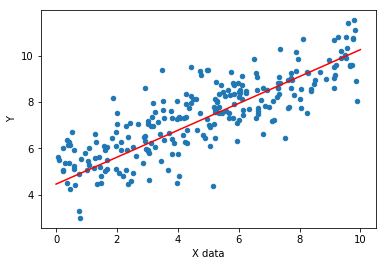

In [63]:
my_data.sample(250).plot(kind='scatter',x='X data',y='Y')
plt.plot(brand_new_data,predictions,'red')

Here we can see we have kind of the same prediction line we got the last time

## 2- Classification Example